
# Prueba de reclutamiento de Python
_Favor de completar lo solicitado abajo una vez complete la prueba técnica_
- Nombre: Addison Amin Reyes Cedano
- Correo: addison.amin@gmail.com
- LinkedIn: Addison Reyes (https://www.linkedin.com/in/addison-reyes-9aa017208/)






## Librerias y Datasets

In [157]:
from scipy.stats import pearsonr, spearmanr
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

# pd.options.display.float_format = '{:,.2f}'.format

In [158]:
# Variables Globales
paises = ["Estados Unidos", "Canadá", "China"]
skiprow = 3

In [159]:
# Datasets
df_pib = pd.read_csv('DATASETS/PRODUCTO_INTERNO_BRUTO.csv', skiprows=skiprow)
df_migracion = pd.read_csv('DATASETS/MIGRACION_NETA.csv', skiprows=skiprow)

df_remesas = pd.read_csv('DATASETS/REMESAS.csv', skiprows=skiprow)
df_ied = pd.read_csv('DATASETS/INVERSION_EXTRANJERA_DIRECTA.csv', skiprows=skiprow)

In [160]:
df_pib.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,NaN,AFE,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afganistán,AFG,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,NaN,AFW,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,PIB (US$ a precios actuales),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN


In [161]:
df_migracion.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Migración neta,SM.POP.NETM,0.0,-569.0,-609.0,-646.0,-684.0,-726.0,...,177.0,170.0,218.0,367.0,412.0,0.0,501.0,164.0,157.0,NaN
1,NaN,AFE,Migración neta,SM.POP.NETM,-90849.0,-1348.0,-24259.0,-16266.0,37452.0,11041.0,...,394925.0,-864708.0,-343075.0,-366105.0,-187410.0,-48955.0,-179444.0,-274282.0,-271749.0,NaN
2,Afganistán,AFG,Migración neta,SM.POP.NETM,2606.0,6109.0,7016.0,6681.0,7079.0,10695.0,...,-281739.0,-90238.0,-47090.0,-47205.0,-8082.0,166821.0,-183672.0,-65846.0,-65846.0,NaN
3,NaN,AFW,Migración neta,SM.POP.NETM,-847.0,-41547.0,-36399.0,-37435.0,-45534.0,-15985.0,...,-360393.0,-167286.0,-200823.0,-255888.0,-328552.0,-99761.0,-264802.0,-186109.0,-183333.0,NaN
4,Angola,AGO,Migración neta,SM.POP.NETM,-43749.0,-49186.0,-54566.0,-59777.0,-71948.0,-87288.0,...,74170.0,91623.0,77733.0,61632.0,58986.0,7557.0,29089.0,-1000.0,-1000.0,NaN


In [162]:
df_remesas.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.810387,1.765777,1.815417,1.126930,1.009012,1.367148,1.155124,1.079905,NaN,NaN
1,NaN,AFE,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224280,1.105184,1.075252,1.359812,1.498650,1.504133,1.599903,1.713108,1.655014,NaN
2,Afganistán,AFG,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.821996,3.464843,4.387093,4.450986,4.407428,3.953297,2.243017,2.206568,NaN,NaN
3,NaN,AFW,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.057538,4.107118,4.608343,4.499426,4.245257,3.713186,3.612465,3.737629,4.111046,NaN
4,Angola,AGO,Remesas de trabajadores y compensación de empl...,BX.TRF.PWKR.DT.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012282,0.007559,0.001925,0.001988,0.004860,0.016604,0.018993,0.013415,0.014242,NaN


In [163]:
df_ied.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.907264,0.923398,5.253373,4.399822,-2.215283,6.294368,4.303487,7.000585,NaN,NaN
1,NaN,AFE,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.191087,2.017779,1.099985,1.338311,1.500133,1.482811,5.039673,1.748597,1.886923,NaN
2,Afganistán,AFG,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.884000,0.516606,0.274797,0.661572,0.124496,0.064994,0.144401,NaN,NaN,NaN
3,NaN,AFW,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.157298,2.260698,2.587302,1.946433,1.556177,1.395569,2.011143,1.892716,2.088676,NaN
4,Angola,AGO,"Inversión extranjera directa, entrada neta de ...",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.081339,-0.340243,-10.038377,-8.125891,-5.780813,-3.848264,-6.548542,-6.320564,-2.501839,NaN


## Estadística Descriptiva

Ingeniería de características

In [164]:
df_pib = df_pib.iloc[:, :-1]
df_migracion = df_migracion.iloc[:, :-1]
df_remesas = df_remesas.iloc[:, :-1]
df_ied = df_ied.iloc[:, :-1]

In [165]:
# Datasets filtrados con los paises de interes
df_pib_filtrado = df_pib[df_pib['Country Name'].isin(paises)]
df_migracion_filtrado = df_migracion[df_migracion['Country Name'].isin(paises)]
df_remesas_filtrado = df_remesas[df_remesas['Country Name'].isin(paises)]
df_ied_filtrado = df_ied[df_ied['Country Name'].isin(paises)]

df_pib_filtrado = df_pib_filtrado.dropna(axis=1, how='all')
df_migracion_filtrado = df_migracion_filtrado.dropna(axis=1, how='all')
df_remesas_filtrado = df_remesas_filtrado.dropna(axis=1, how='all')
df_ied_filtrado = df_ied_filtrado.dropna(axis=1, how='all')

In [166]:
df_remesas_filtrado.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023'],
      dtype='object')

In [167]:
df_migracion_filtrado = df_migracion_filtrado[df_remesas_filtrado.columns]
df_pib_filtrado = df_pib_filtrado[df_remesas_filtrado.columns]
df_ied_filtrado = df_ied_filtrado[df_remesas_filtrado.columns]

In [168]:
df_migracion_filtrado.reset_index(drop=True, inplace=True)
df_remesas_filtrado.reset_index(drop=True, inplace=True)
df_pib_filtrado.reset_index(drop=True, inplace=True)
df_ied_filtrado.reset_index(drop=True, inplace=True)

In [169]:
df_pib_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3 non-null      object 
 1   Country Code    3 non-null      object 
 2   Indicator Name  3 non-null      object 
 3   Indicator Code  3 non-null      object 
 4   1977            3 non-null      float64
 5   1978            3 non-null      float64
 6   1979            3 non-null      float64
 7   1980            3 non-null      float64
 8   1981            3 non-null      float64
 9   1982            3 non-null      float64
 10  1983            3 non-null      float64
 11  1984            3 non-null      float64
 12  1985            3 non-null      float64
 13  1986            3 non-null      float64
 14  1987            3 non-null      float64
 15  1988            3 non-null      float64
 16  1989            3 non-null      float64
 17  1990            3 non-null      float64

In [170]:
df_migracion_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3 non-null      object 
 1   Country Code    3 non-null      object 
 2   Indicator Name  3 non-null      object 
 3   Indicator Code  3 non-null      object 
 4   1977            3 non-null      float64
 5   1978            3 non-null      float64
 6   1979            3 non-null      float64
 7   1980            3 non-null      float64
 8   1981            3 non-null      float64
 9   1982            3 non-null      float64
 10  1983            3 non-null      float64
 11  1984            3 non-null      float64
 12  1985            3 non-null      float64
 13  1986            3 non-null      float64
 14  1987            3 non-null      float64
 15  1988            3 non-null      float64
 16  1989            3 non-null      float64
 17  1990            3 non-null      float64

In [171]:
df_remesas_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3 non-null      object 
 1   Country Code    3 non-null      object 
 2   Indicator Name  3 non-null      object 
 3   Indicator Code  3 non-null      object 
 4   1977            1 non-null      float64
 5   1978            1 non-null      float64
 6   1979            1 non-null      float64
 7   1980            1 non-null      float64
 8   1981            1 non-null      float64
 9   1982            2 non-null      float64
 10  1983            2 non-null      float64
 11  1984            2 non-null      float64
 12  1985            2 non-null      float64
 13  1986            2 non-null      float64
 14  1987            2 non-null      float64
 15  1988            2 non-null      float64
 16  1989            2 non-null      float64
 17  1990            2 non-null      float64

In [172]:
df_ied_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    3 non-null      object 
 1   Country Code    3 non-null      object 
 2   Indicator Name  3 non-null      object 
 3   Indicator Code  3 non-null      object 
 4   1977            2 non-null      float64
 5   1978            2 non-null      float64
 6   1979            3 non-null      float64
 7   1980            3 non-null      float64
 8   1981            3 non-null      float64
 9   1982            3 non-null      float64
 10  1983            3 non-null      float64
 11  1984            3 non-null      float64
 12  1985            3 non-null      float64
 13  1986            3 non-null      float64
 14  1987            3 non-null      float64
 15  1988            3 non-null      float64
 16  1989            3 non-null      float64
 17  1990            3 non-null      float64

In [173]:
def calculate_statistics(df):
    years = df.columns[4:]
    results = pd.DataFrame()

    results['Country Name'] = df['Country Name']
    results['Media'] = df[years].mean(axis=1)
    results['Mediana'] = df[years].median(axis=1)
    results['Desviación Estándar'] = df[years].std(axis=1)
    results['Rango'] = df[years].max(axis=1) - df[years].min(axis=1)
    results['Mínimo'] = df[years].min(axis=1)
    results['Máximo'] = df[years].max(axis=1)

    return results

In [174]:
calculate_statistics(df_pib_filtrado)

,Country Name,Media,Mediana,Desviación Estándar,Rango,Mínimo,Máximo
0,Canadá,9.958744e+11,7.389818e+11,6.147671e+11,1.949158e+12,2.123252e+11,2.161483e+12
1,China,4.448837e+12,1.211332e+12,5.701940e+12,1.773224e+13,1.495408e+11,1.788178e+13
2,Estados Unidos,1.125277e+13,1.025095e+13,6.860495e+12,2.527911e+13,2.081826e+12,2.736094e+13


In [175]:
calculate_statistics(df_migracion_filtrado)

,Country Name,Media,Mediana,Desviación Estándar,Rango,Mínimo,Máximo
0,Canadá,1.785646e+05,195181.0,89219.236938,393541.0,24433.0,417974.0
1,China,-3.131382e+05,-296674.0,229725.502265,863254.0,-873177.0,-9923.0
2,Estados Unidos,1.190085e+06,1148506.0,356371.960517,1305239.0,561580.0,1866819.0


In [176]:
calculate_statistics(df_remesas_filtrado)

,Country Name,Media,Mediana,Desviación Estándar,Rango,Mínimo,Máximo
0,Canadá,0.074155,0.076894,0.014196,0.057276,0.039587,0.096863
1,China,0.169610,0.155992,0.089620,0.443796,0.033429,0.477224
2,Estados Unidos,0.026946,0.028772,0.012982,0.042242,0.001844,0.044086


In [177]:
calculate_statistics(df_ied_filtrado)

,Country Name,Media,Mediana,Desviación Estándar,Rango,Mínimo,Máximo
0,Canadá,2.349804,2.115635,1.785226,9.142401,0.028623,9.171024
1,China,2.466827,2.559248,1.734910,6.186837,0.000045,6.186882
2,Estados Unidos,1.327851,1.209693,0.784947,3.265520,0.140261,3.405781


In [178]:
df_pib_filtrado.iloc[:, 4:].quantile([0.25, 0.5, 0.75])

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0.25,1.936306e+11,1.844551e+11,2.110859e+11,2.329629e+11,2.515565e+11,2.598688e+11,2.862765e+11,3.083325e+11,3.378370e+11,3.398825e+11,...,6.140687e+12,6.309041e+12,6.380654e+12,6.979878e+12,7.810119e+12,8.011847e+12,8.171714e+12,9.913966e+12,1.002163e+13,9.967434e+12
0.50,2.123252e+11,2.193695e+11,2.438911e+11,2.747766e+11,3.072466e+11,3.146478e+11,3.418663e+11,3.567184e+11,3.661860e+11,3.790068e+11,...,1.047562e+13,1.106157e+13,1.123331e+13,1.231049e+13,1.389491e+13,1.427997e+13,1.468774e+13,1.782046e+13,1.788178e+13,1.779478e+13
0.75,1.147076e+12,1.285484e+12,1.435612e+12,1.566042e+12,1.757144e+12,1.829218e+12,1.987952e+12,2.197166e+12,2.352583e+12,2.479319e+12,...,1.404188e+13,1.467830e+13,1.501911e+13,1.596130e+13,1.727571e+13,1.790068e+13,1.800535e+13,2.070725e+13,2.181295e+13,2.257786e+13


In [179]:
df_migracion_filtrado.iloc[:, 4:].quantile([0.25, 0.5, 0.75])

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0.25,19307.0,14047.5,26124.5,40569.5,30685.0,14169.0,-4910.0,-13763.0,-10568.0,7598.0,...,-1391.5,38679.5,83720.0,90341.0,60650.0,44652.5,80766.0,-2506.5,-31397.0,-30237.0
0.50,53941.0,38018.0,65954.0,101270.0,89387.0,64523.0,33942.0,24433.0,39796.0,94389.0,...,195649.0,232738.0,320494.0,361274.0,417974.0,391914.0,195181.0,195181.0,248586.0,249746.0
0.75,534899.0,593262.0,592800.0,612207.0,404224.5,382807.0,416743.0,375224.5,399457.0,389561.0,...,723281.5,727293.5,884932.5,869452.0,809385.0,775179.0,435370.5,378380.5,623563.0,624723.0


In [180]:
df_remesas_filtrado.iloc[:, 4:].quantile([0.25, 0.5, 0.75])

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0.25,0.009607,0.009355,0.008754,0.0028,0.002495,0.077044,0.060389,0.040244,0.023274,0.051883,...,0.055883,0.058911,0.059021,0.054628,0.054347,0.053991,0.040827,0.035742,0.034368,0.033929
0.50,0.009607,0.009355,0.008754,0.0028,0.002495,0.151696,0.118576,0.078507,0.044704,0.083940,...,0.074833,0.081866,0.084380,0.076894,0.075091,0.075229,0.049637,0.041420,0.039965,0.039587
0.75,0.009607,0.009355,0.008754,0.0028,0.002495,0.226348,0.176763,0.116769,0.066134,0.115996,...,0.180179,0.190571,0.161849,0.154917,0.125008,0.101670,0.089077,0.083783,0.092944,0.101588


In [181]:
df_ied_filtrado.iloc[:, 4:].quantile([0.25, 0.5, 0.75])

,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0.25,0.502208,0.601656,0.153220,0.307843,0.175659,0.119144,0.296075,0.554410,0.282572,0.649578,...,1.994793,2.493830,1.896994,1.443322,1.366674,1.389474,1.182993,1.973710,1.326158,0.757433
0.50,0.864155,0.969428,0.306394,0.585866,0.216022,0.209664,0.316452,0.624874,0.343203,0.675731,...,2.559248,2.795482,2.238350,1.537521,1.693894,1.468232,1.723176,2.016633,1.588643,1.274752
0.75,1.226102,1.337201,1.241334,1.350751,0.508380,0.422286,0.833718,1.107919,0.439625,0.695336,...,3.056575,3.324688,2.380516,1.739648,2.081603,2.137499,1.741073,2.480942,1.950580,1.752873


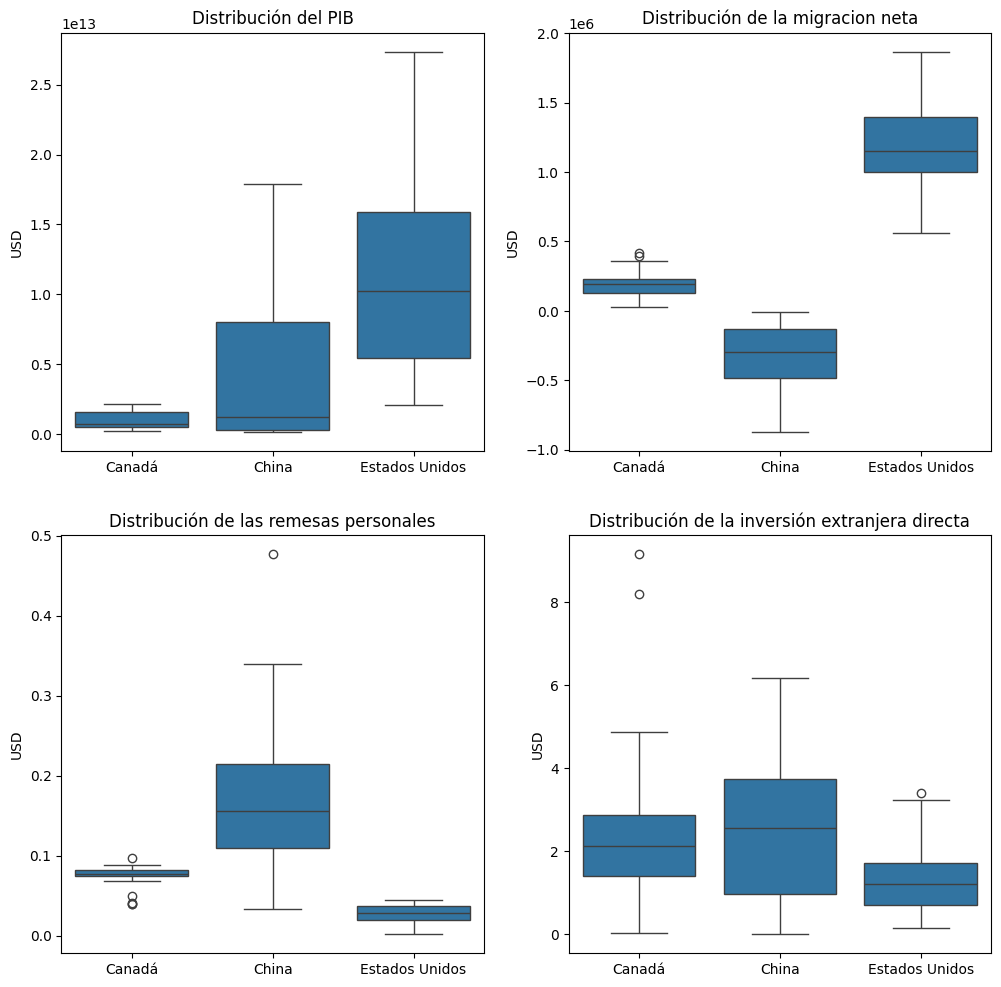

In [182]:
titles = [
    "Distribución del PIB",
    "Distribución de la migracion neta",
    "Distribución de las remesas personales",
    "Distribución de la inversión extranjera directa",
]

plt.figure(figsize=(12, 25))
for i, df in enumerate([df_pib_filtrado, df_migracion_filtrado, df_remesas_filtrado, df_ied_filtrado]):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=df.melt(id_vars=["Country Name"], value_vars=df.columns[4:]), 
                x="Country Name", y="value")

    plt.title(titles[i])
    plt.xlabel("")
    plt.ylabel("USD")

plt.show()

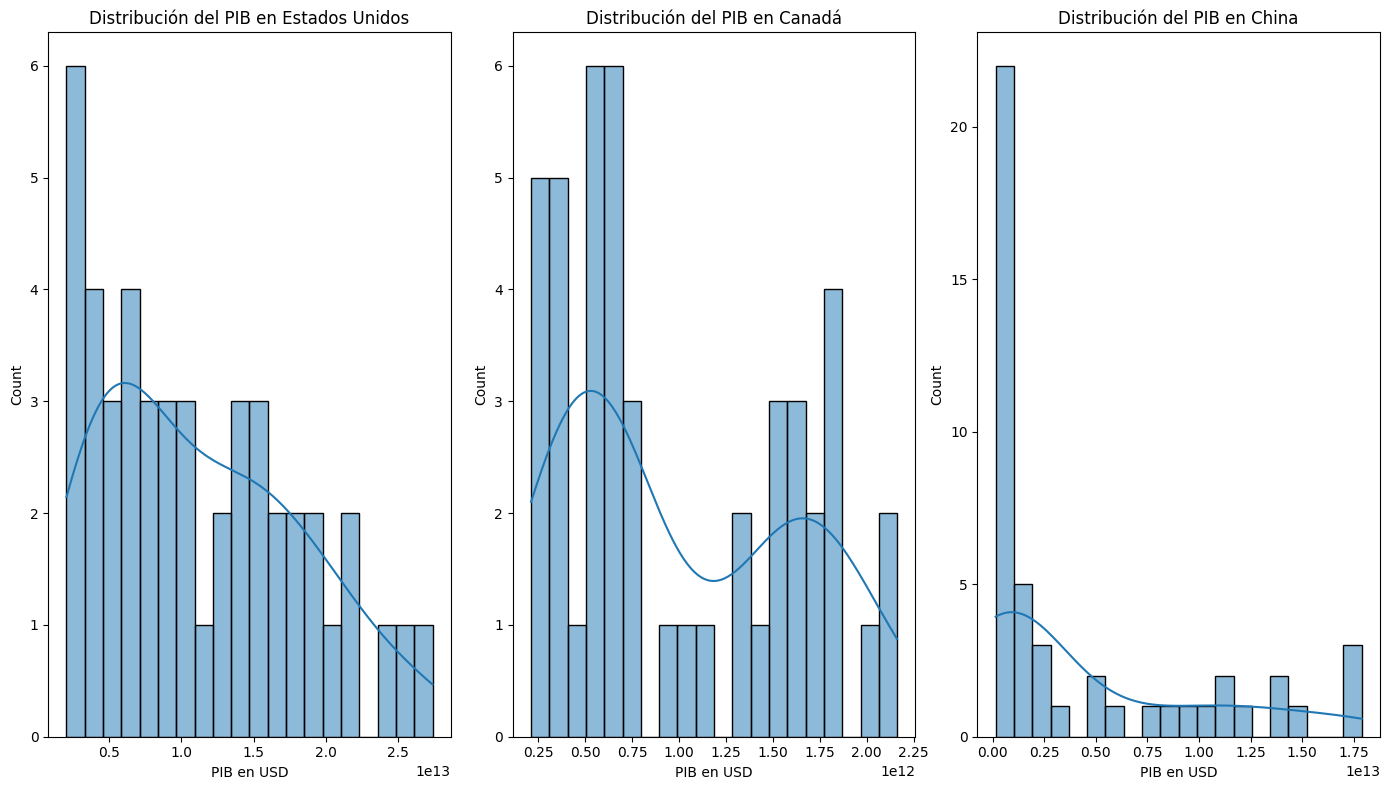

In [183]:
plt.figure(figsize=(14, 8))
for i, country in enumerate(paises):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_pib_filtrado[df_pib_filtrado["Country Name"] == country].iloc[:, 4:].values.flatten(), bins=20, kde=True)
    plt.title(f"Distribución del PIB en {country}")
    plt.xlabel("PIB en USD")
    
plt.tight_layout()
plt.show()

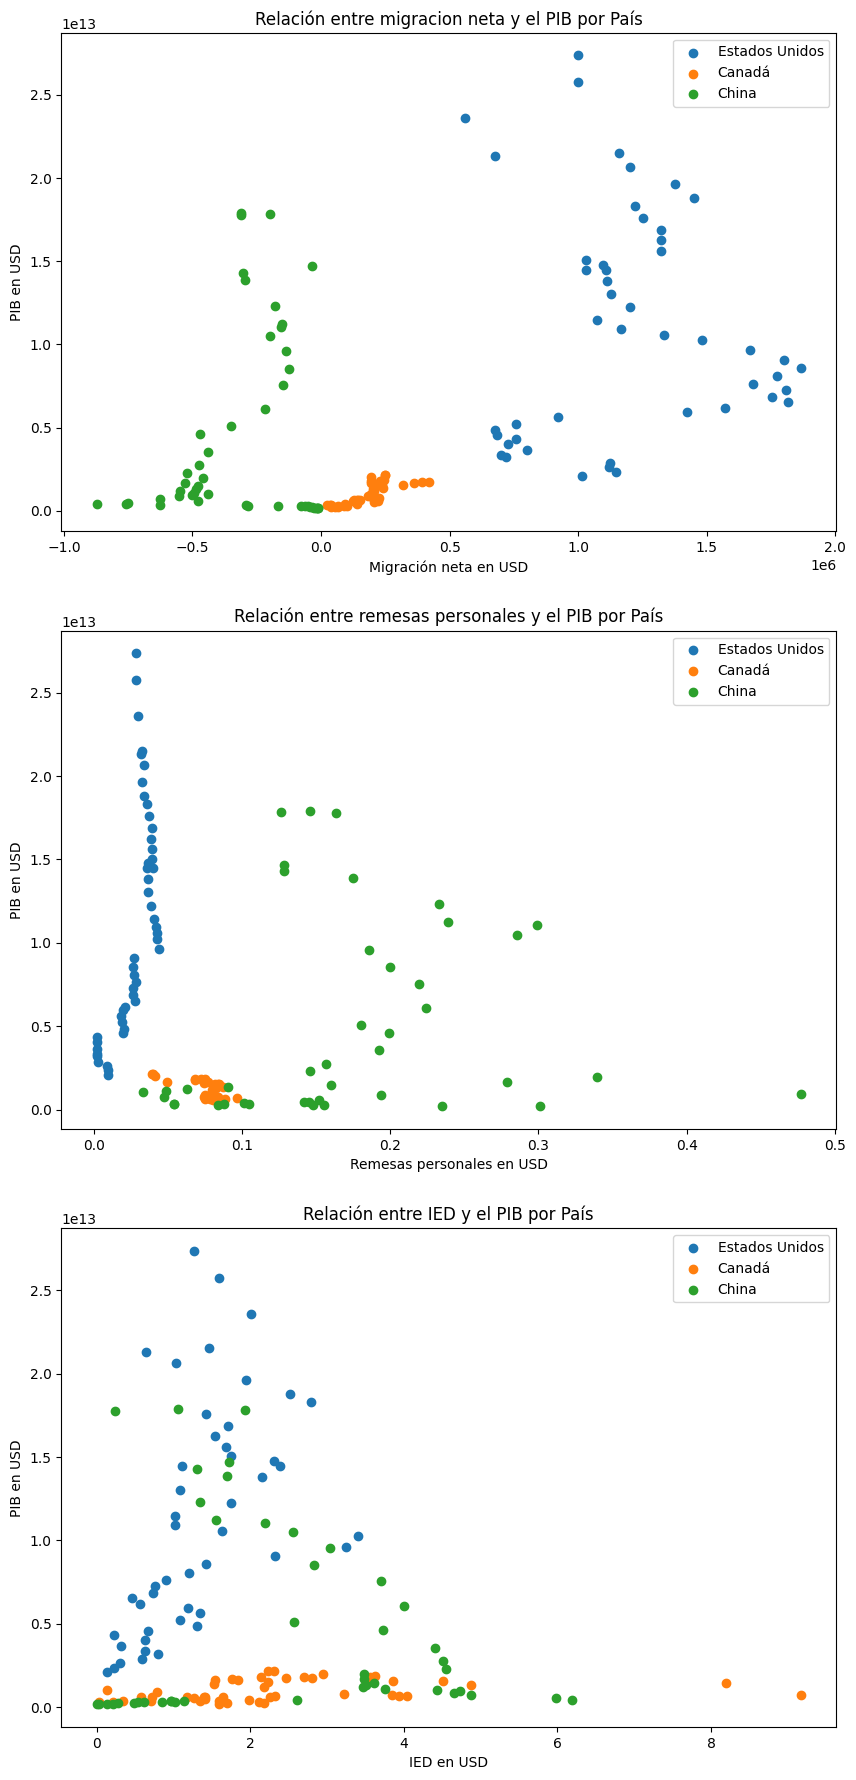

In [184]:
titles = [
    "Relación entre migracion neta y el PIB por País",
    "Relación entre remesas personales y el PIB por País",
    "Relación entre IED y el PIB por País",
]

xlabels = [
    "Migración neta en USD",
    "Remesas personales en USD",
    "IED en USD",
]

plt.figure(figsize=(10, 22))
for i, df in enumerate([df_migracion_filtrado, df_remesas_filtrado, df_ied_filtrado]):
    plt.subplot(3, 1, i+1)
    for country in paises:
        plt.scatter(
            df[df["Country Name"] == country].iloc[:, 4:].values.flatten(),
            df_pib_filtrado[df_pib_filtrado["Country Name"] == country].iloc[:, 4:].values.flatten(),
            label=country
        )

    plt.title(titles[i])
    plt.xlabel(xlabels[i])
    plt.ylabel("PIB en USD")
    plt.legend()

plt.show()

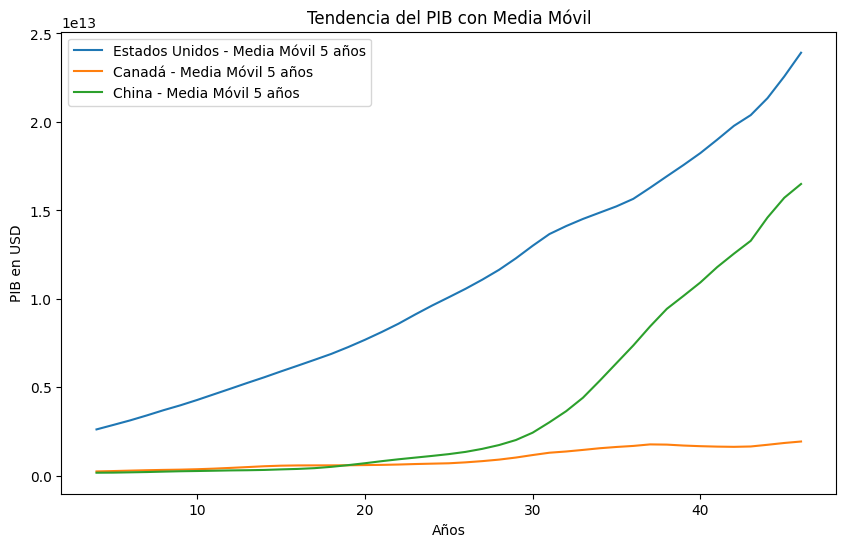

In [185]:
plt.figure(figsize=(10, 6))
for country in paises:
    pib_country = df_pib_filtrado[df_pib_filtrado["Country Name"] == country].iloc[:, 4:].values.flatten()
    plt.plot(pd.Series(pib_country).rolling(window=5).mean(), label=f"{country} - Media Móvil 5 años")
    
plt.xlabel("Años")
plt.ylabel("PIB en USD")
plt.title("Tendencia del PIB con Media Móvil")
plt.legend()
plt.show()

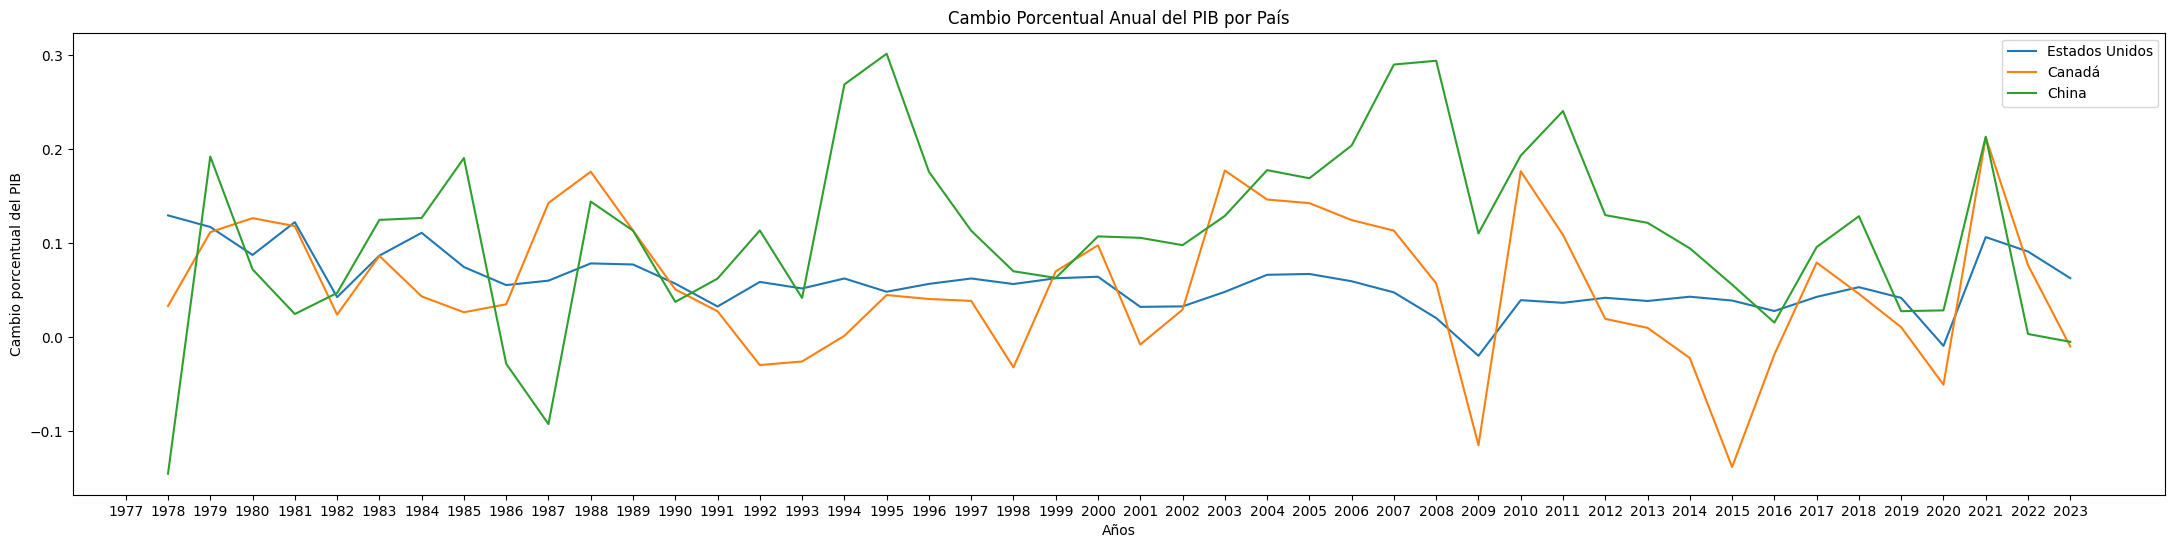

In [186]:
plt.figure(figsize=(27, 6))
for country in paises:
    pib_country = df_pib_filtrado[df_pib_filtrado["Country Name"] == country].iloc[:, 4:].pct_change(axis=1, fill_method=None).mean()
    plt.plot(pib_country, label=country)

plt.xlabel("Años")
plt.ylabel("Cambio porcentual del PIB")
plt.title("Cambio Porcentual Anual del PIB por País")
plt.legend()
plt.show()

Inversión Extranjera Directa (IED): La IED suele tener un impacto positivo en el PIB al fomentar el desarrollo de infraestructura, la creación de empleo y la transferencia de tecnología. En países en desarrollo, este efecto puede ser más marcado, mientras que en economías avanzadas el impacto adicional puede ser menor.

Remesas Personales: En países que dependen en gran medida de las remesas, estas impulsan el consumo y contribuyen al crecimiento del PIB. Sin embargo, en economías desarrolladas, el papel de las remesas en el PIB es menos relevante.

Migración Neta: Una migración neta positiva puede aumentar el crecimiento económico al expandir la fuerza laboral y la demanda interna, aunque el impacto depende de la capacidad del país para integrar a los inmigrantes de manera productiva.

En conjunto, espero que la IED y las remesas tengan una relación positiva con el PIB, mientras que la migración neta podría tener un efecto indirecto, pero potencialmente favorable en el crecimiento económico.

## Proyección e intervalos de confianza

In [187]:
def proyecciones(df, year = 2023, n_years = 6):
    years = [str(year + i) for i in range(n_years)]
    df_data = df.loc[:, "2000":"2023"]

    tasa_crecimiento = df_data.pct_change(axis='columns', fill_method=None).mean(axis=1)
    projecciones = [df[str(year)] * ((1 + tasa_crecimiento) ** i) for i in range(n_years)]

    proyecciones = pd.DataFrame(projecciones, index=years).transpose()
    proyecciones.columns = years

    proyecciones.insert(0, 'Pais', list(df['Country Name']))
    return proyecciones

In [188]:
proyeciones_pib = proyecciones(df_pib_filtrado)
proyeciones_pib

,Pais,2023,2024,2025,2026,2027,2028
0,Canadá,2.140086e+12,2.248925e+12,2.363299e+12,2.483490e+12,2.609794e+12,2.742521e+12
1,China,1.779478e+13,2.005546e+13,2.260335e+13,2.547492e+13,2.871130e+13,3.235883e+13
2,Estados Unidos,2.736094e+13,2.856325e+13,2.981840e+13,3.112871e+13,3.249660e+13,3.392459e+13


In [189]:
proyeciones_migracion = proyecciones(df_migracion_filtrado)
proyeciones_migracion

,Pais,2023,2024,2025,2026,2027,2028
0,Canadá,249746.0,2.561398e+05,2.626972e+05,2.694226e+05,2.763201e+05,2.833942e+05
1,China,-310220.0,-3.714758e+05,-4.448270e+05,-5.326622e+05,-6.378412e+05,-7.637887e+05
2,Estados Unidos,999700.0,1.001354e+06,1.003010e+06,1.004669e+06,1.006330e+06,1.007995e+06


In [190]:
proyeciones_remesas = proyecciones(df_remesas_filtrado)
proyeciones_remesas

,Pais,2023,2024,2025,2026,2027,2028
0,Canadá,0.039587,0.038731,0.037894,0.037075,0.036274,0.035490
1,China,0.163589,0.177898,0.193460,0.210382,0.228785,0.248798
2,Estados Unidos,0.028270,0.027779,0.027296,0.026822,0.026356,0.025897


In [191]:
proyeciones_ied = proyecciones(df_ied_filtrado)
proyeciones_ied

,Pais,2023,2024,2025,2026,2027,2028
0,Canadá,2.230995,3.587774,5.769678,9.278507,14.921229,23.995571
1,China,0.240114,0.226042,0.212796,0.200326,0.188586,0.177535
2,Estados Unidos,1.274752,1.391909,1.519833,1.659514,1.812033,1.978569


In [192]:
def analisis_proyeciones(df, variable: str):
    df = df.melt(id_vars="Pais", var_name="Año", value_name=variable)

    fig_area = px.area(df, x="Año", y=variable, color="Pais", title=f"Evolución Acumulativa, {variable} por País (2023-2027)")
    fig_area.update_layout(yaxis_title=f"{variable} (USD)", xaxis_title="Año")

    fig_bar_grouped = px.bar(df, x="Año", y=variable, color="Pais", title=f"Comparación de {variable} por País (Barras Agrupadas)", barmode='group')
    fig_bar_grouped.update_layout(yaxis_title=f"{variable} (USD)", xaxis_title="Año")

    for i, var in enumerate(df[variable]):
        if var <= 0:
            df.loc[i, variable] = 0
    
    fig_bubble = px.scatter(df, x="Año", y=variable, color="Pais", size=variable, 
                            title=f"{variable} por País con Tamaño de Burbujas (2023-2027)", 
                            size_max=60)
    fig_bubble.update_layout(yaxis_title=f"{variable} (USD)", xaxis_title="Año")

    fig_area.show()
    fig_bar_grouped.show()
    fig_bubble.show()

In [193]:
analisis_proyeciones(proyeciones_pib, "PIB")

In [194]:
analisis_proyeciones(proyeciones_migracion, "Migracion neta")

In [195]:
analisis_proyeciones(proyeciones_remesas, "Remesas personales")

In [196]:
analisis_proyeciones(proyeciones_ied, "IED")

In [197]:
historico_std = df_pib_filtrado.loc[:, '1977':'2023'].std(axis=1)

nivel_confianza = 0.95
z_value = 1.96

intervalos_confianza = pd.DataFrame(columns=['Pais', 'Año', 'Proyección', 'Límite Inferior', 'Límite Superior'])

for i, row in proyeciones_pib.iterrows():
    pais = row['Pais']
    se = historico_std[i] / np.sqrt(len(df_pib_filtrado.columns) - 1)
    
    for año, proyeccion in row[1:].items():
        lim_inferior = proyeccion - z_value * se
        lim_superior = proyeccion + z_value * se
        
        intervalos_confianza = intervalos_confianza._append({
            'Pais': pais,
            'Año': año,
            'Proyección': proyeccion,
            'Límite Inferior': lim_inferior,
            'Límite Superior': lim_superior
        }, ignore_index=True)

C:\Users\Addison\AppData\Local\Temp\ipykernel_18060\988541613.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [198]:
intervalos_confianza

,Pais,Año,Proyección,Límite Inferior,Límite Superior
0,Canadá,2023,2.140086e+12,1.969681e+12,2.310490e+12
1,Canadá,2024,2.248925e+12,2.078520e+12,2.419329e+12
2,Canadá,2025,2.363299e+12,2.192894e+12,2.533704e+12
3,Canadá,2026,2.483490e+12,2.313085e+12,2.653895e+12
4,Canadá,2027,2.609794e+12,2.439389e+12,2.780199e+12
5,Canadá,2028,2.742521e+12,2.572116e+12,2.912926e+12
6,China,2023,1.779478e+13,1.621428e+13,1.937528e+13
7,China,2024,2.005546e+13,1.847497e+13,2.163596e+13
8,China,2025,2.260335e+13,2.102285e+13,2.418384e+13
9,China,2026,2.547492e+13,2.389442e+13,2.705541e+13


## Análisis de Correlación

In [199]:
def matrix_de_correlacion(pais):
    years = [str(year) for year in range(2000, 2024)]

    df_pib_pais = df_pib_filtrado[df_pib_filtrado["Country Name"] == pais].loc[:, years].transpose()
    df_remesas_pais = df_remesas_filtrado[df_remesas_filtrado["Country Name"] == pais].loc[:, years].transpose()
    df_ied_pais = df_ied_filtrado[df_ied_filtrado["Country Name"] == pais].loc[:, years].transpose()
    df_migracion_pais = df_migracion_filtrado[df_migracion_filtrado["Country Name"] == pais].loc[:, years].transpose()

    df_pais = pd.concat([df_pib_pais.rename(columns={df_pib_pais.columns[0]: "PIB"}),
                        df_remesas_pais.rename(columns={df_remesas_pais.columns[0]: "Remesas"}),
                        df_ied_pais.rename(columns={df_ied_pais.columns[0]: "IED"}),
                        df_migracion_pais.rename(columns={df_migracion_pais.columns[0]: "Migración Neta"})], 
                    axis=1)

    return df_pais.corr()

In [200]:
def heatmap(matrix_correlacion, pais):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix_correlacion, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title(f"Matriz de Correlación para {pais}")
    plt.show()

In [201]:
def info_correlacion(matrix_correlacion):
    correlation_results = {
        "Variable1": [],
        "Variable2": [],
        "Pearson Correlation": [],
        "Pearson p-value": [],
        "Spearman Correlation": [],
        "Spearman p-value": []
    }

    variables = ["PIB", "Remesas", "IED", "Migración Neta"]
    for i in range(len(variables)):
        for j in range(i+1, len(variables)):
            var1 = variables[i]
            var2 = variables[j]
            
            pearson_corr, pearson_p = pearsonr(matrix_correlacion[var1], matrix_correlacion[var2])
            spearman_corr, spearman_p = spearmanr(matrix_correlacion[var1], matrix_correlacion[var2])
            
            correlation_results["Variable1"].append(var1)
            correlation_results["Variable2"].append(var2)
            correlation_results["Pearson Correlation"].append(pearson_corr)
            correlation_results["Pearson p-value"].append(pearson_p)
            correlation_results["Spearman Correlation"].append(spearman_corr)
            correlation_results["Spearman p-value"].append(spearman_p)

    df_correlation_results = pd.DataFrame(correlation_results)
    df_correlation_results


In [202]:
def pairplot(matrix_correlacion, pais):
    plt.figure(figsize=(8, 6))
    sns.pairplot(matrix_correlacion, diag_kind="kde", plot_kws={"alpha": 0.5})
    plt.suptitle(f"Gráficos de Dispersión entre Variables ({pais})", y=1.02)
    plt.show()

In [203]:
matrix_correlacion_usa = matrix_de_correlacion("Estados Unidos")
info_correlacion(matrix_correlacion_usa)

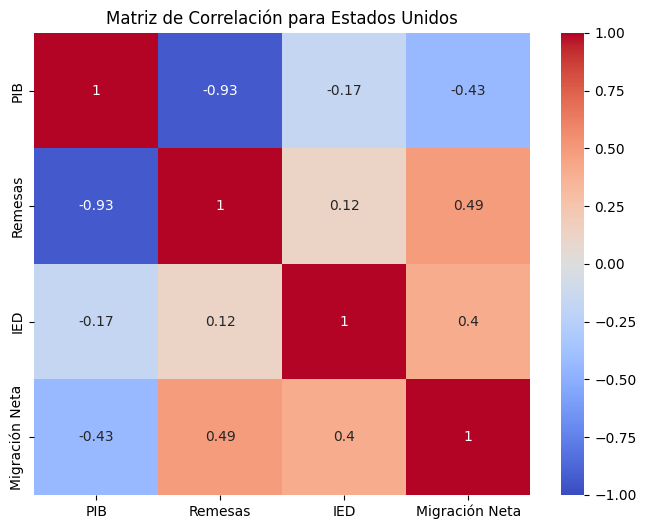

<Figure size 800x600 with 0 Axes>

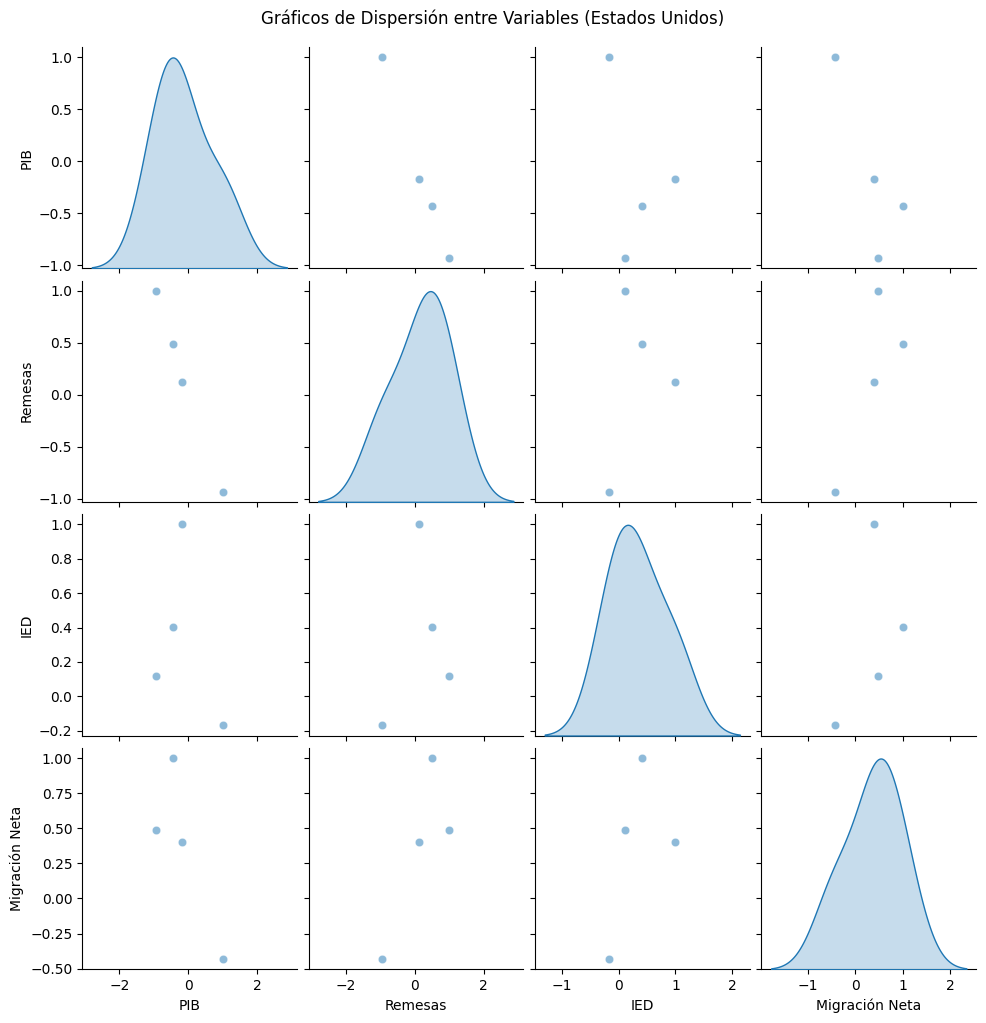

In [204]:
heatmap(matrix_correlacion_usa, "Estados Unidos")
pairplot(matrix_correlacion_usa, "Estados Unidos")

In [205]:
matrix_correlacion_chn = matrix_de_correlacion("China")
info_correlacion(matrix_correlacion_chn)

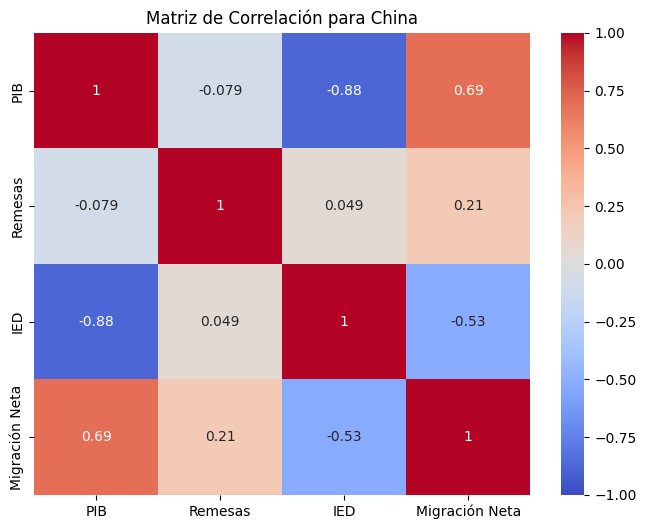

<Figure size 800x600 with 0 Axes>

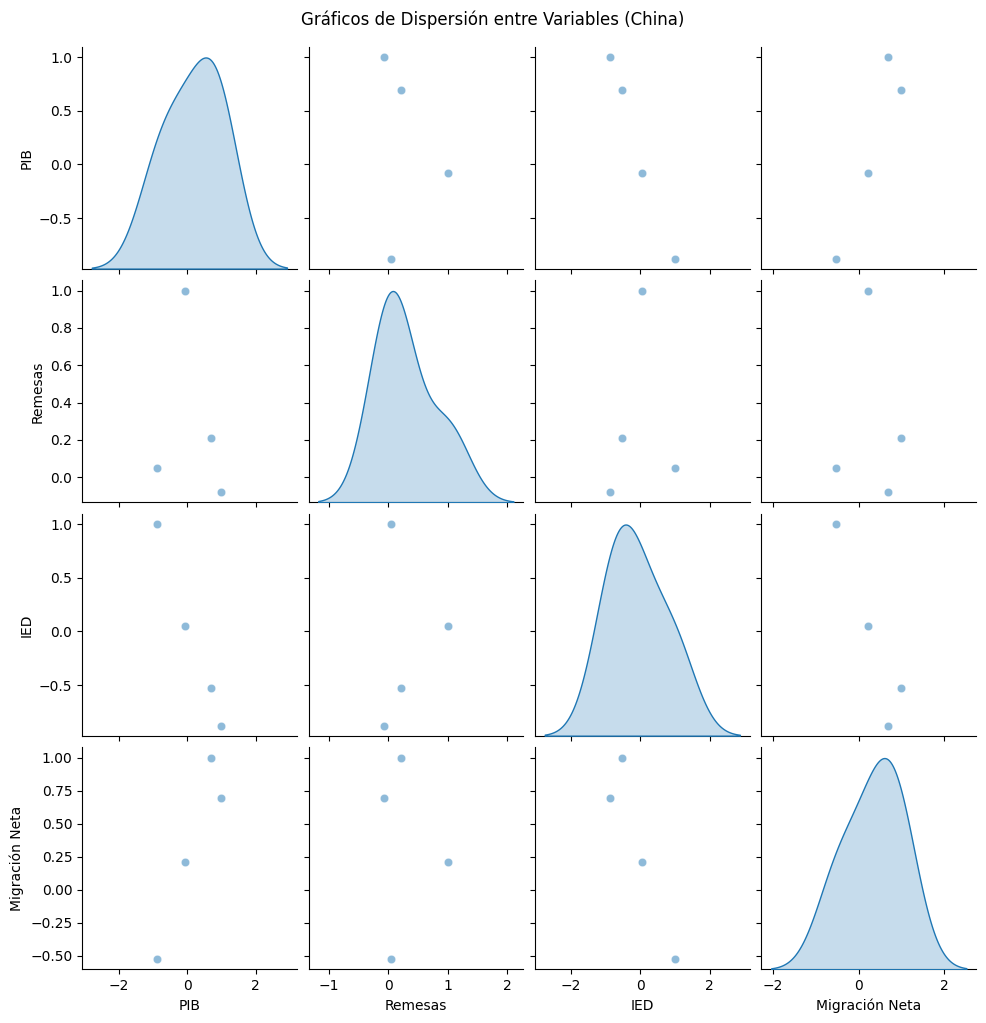

In [206]:
heatmap(matrix_correlacion_chn, "China")
pairplot(matrix_correlacion_chn, "China")

In [207]:
matrix_correlacion_can = matrix_de_correlacion("Canadá")
info_correlacion(matrix_correlacion_can)

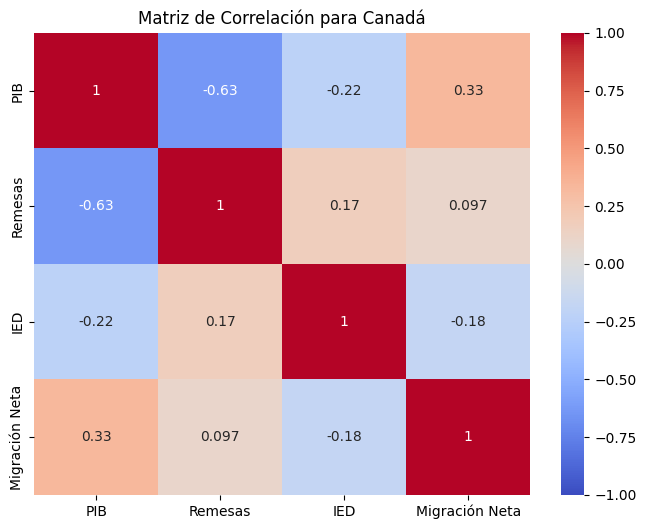

<Figure size 800x600 with 0 Axes>

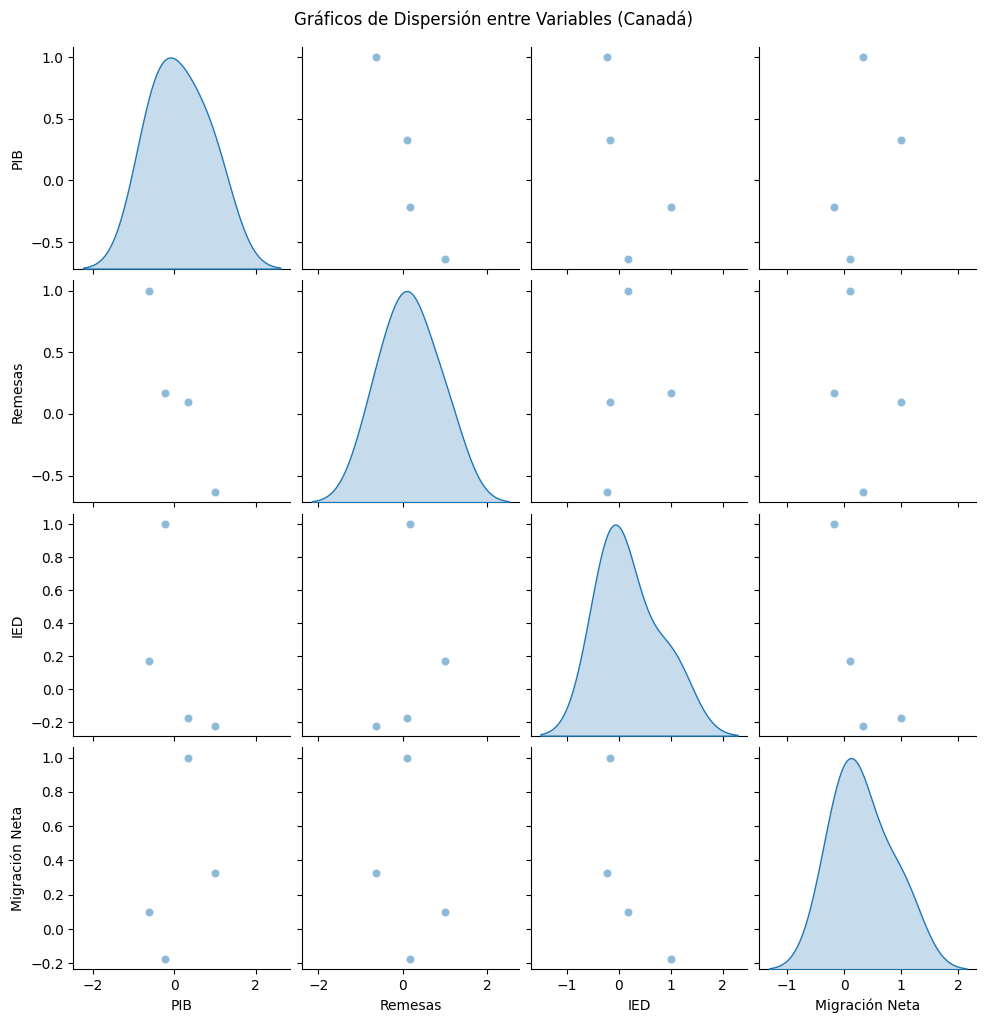

In [208]:
heatmap(matrix_correlacion_can, "Canadá")
pairplot(matrix_correlacion_can, "Canadá")

Basado en lo visto en las metricas, el analisis de los resultados son:

Estados Unidos no cumple las expectativas teniendo una correlación negativa en relación a las remesas personales con el PIB, La migración neta en relación al PIB tiene una correlación entre neutra y negativa, mientras que la variable del IED tiene una correlación negativa muy débil.

China tampoco cumple con las expectativas del todo teniendo una fuerte correlación negativa entre el IED con el PIB, mientras que las remesas personales tienen un ligera correlación negativa con el PIB y por ultimo la migración neta, la cual cumple con lo mencionado en la primera parte de que la migración neta podría tener un efecto indirecto en el PIB teniendo una correlación positiva fuerte.

Canada por otro lado tanto el IED y las remesas personales tienen una ligera correlación negativa lo cual no cumple tanto con las expectativas de la primera parte, mientras que la migración neta al igual que en el caso de China tine una correlación positiva con el PIB

## Análisis de Regresión

## Conclusiones